# Implementing Transfer Learning with Xception and Data Augmentation in Deep Learning

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Resize the image input based on Xception model input
IMAGE_SIZE = [224,224] # Constant value of image

In [3]:
# Then Create train and test path of images
train_path = 'Xception/train'
valid_path = 'Xception/test' # Test Path

In [4]:
# Load Xception model with pre-trained weights
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# Don't train existing weights these are already trained within the model
for layer in xception.layers:
    layer.trainable = False

In [6]:
# Useful for getting number of classes
folders = glob('Xception/train/*')

In [7]:
folders

['Xception/train\\Aafik',
 'Xception/train\\Ahamed',
 'Xception/train\\Basith',
 'Xception/train\\Najim']

In [8]:
# Our layers added in Xception - you can add more if you want
x = Flatten()(xception.output)
# x = Dense(1000, activation='relu')(x) # This in dense layer for Xception
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object using transfer learning
model = Model(inputs=xception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [11]:
# Tell the model what cost and optimization method to use
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Now Fitting Image in the model

In [12]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Load data
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 4 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [14]:
# Fit the model
fitmodel = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/5
1/1 [==============================] - 8s 8s/step - loss: 1.5145 - accuracy: 0.2500 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 3.2783e-07 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 8.9407e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


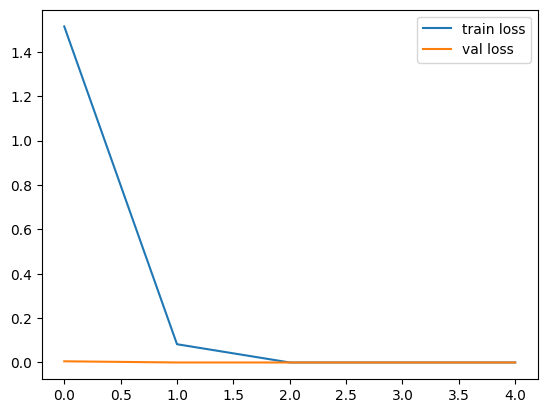

<Figure size 640x480 with 0 Axes>

In [15]:
# loss
plt.plot(fitmodel.history['loss'], label='train loss')
plt.plot(fitmodel.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

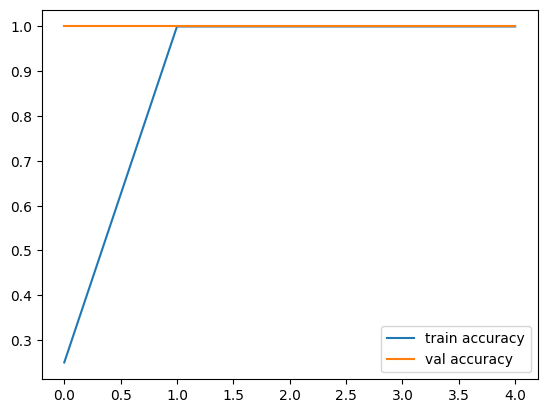

<Figure size 640x480 with 0 Axes>

In [16]:
# accuracies
plt.plot(fitmodel.history['accuracy'], label='train accuracy')
plt.plot(fitmodel.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [17]:
import tensorflow as tf

from keras.models import load_model

model.save('faces_model.h5')

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.applications.xception import Xception, preprocess_input

# Function to preprocess the image and make predictions
def predict_image(img_path, model, image_size=(224, 224)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)  # Using TensorFlow's image module
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Use the same preprocessing function as used during training

    # Make prediction
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)
    
    # Get the class labels
    class_labels = {v: k for k, v in training_set.class_indices.items()}  # Mapping class index to class label
    predicted_class = class_labels[class_idx[0]]
    
    return predicted_class, prediction[0]



In [19]:
# Load the trained model
model = load_model('faces_model.h5')


In [20]:
# Predict an image
img_path = 'Xception/test/Ahamed/Ahamed.jpg'  # Replace with your image path
predicted_class, prediction = predict_image(img_path, model)

1/1 [==============================] - 1s 1s/step


In [21]:
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {prediction}")

Predicted Class: Ahamed
Prediction Probabilities: [6.1461174e-19 1.0000000e+00 1.5477291e-26 1.4085879e-20]


## Implementing With Tkinter

In [22]:
import tkinter as tk
from tkinter import filedialog, Label, Button,Frame
from tkinter import font as tkfont
from PIL import Image, ImageTk

In [23]:
# Define the function to open file dialog and predict image
def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Load and display the image
        img = Image.open(file_path)
        img = img.resize((200, 200))
        img_tk = ImageTk.PhotoImage(img)
        image_label.config(image=img_tk)
        image_label.image = img_tk
        
        # Predict the image
        predicted_class = predict_image(file_path, model)
        result_label.config(text=f"Predicted Class: {predicted_class}")

In [24]:
# Set up the Tkinter window
root = tk.Tk()
root.title("Image Classification")

# Create a button to upload an image
upload_button = Button(root, text="Upload Image", command=upload_image)
upload_button.pack(pady=20)

# Create a label to display the image
image_label = Label(root)
image_label.pack(pady=10)

# Create a label to display the prediction
result_label = Label(root, text="Prediction will be shown here")
result_label.pack(pady=20)

# Run the Tkinter event loop
root.mainloop()

1/1 [==============================] - 0s 92ms/step


We are use only one image for each class with data augumentation so our prediction is average.
### Note: 
Use More Images for training and testing for best prediction

#### Prepared By,
Ahamed Basith